In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *

%matplotlib inline  

In [2]:
data = pd.read_csv("/Users/Owner/Desktop/CSV File/EXvsLA.csv")

In [3]:
data.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score
39995,FT,2018-05-01,96.5,3.3968,5.2475,Yonder Alonso,475174,518617,null,ball,...,3,2-Seam Fastball,2,6,2,6,6,2,2,6
39996,FC,2018-05-01,91.5,-2.2058,5.7058,Jose Peraza,606299,606930,field_out,hit_into_play,...,3,Cutter,6,7,6,7,7,6,6,7
39997,FT,2018-05-01,96.5,-1.8399,5.2954,Yadiel Rivera,592680,605441,null,ball,...,1,2-Seam Fastball,1,1,1,1,1,1,1,1
39998,FT,2018-05-01,96.5,-2.6407,5.9867,Kolten Wong,543939,518858,sac_bunt,hit_into_play,...,1,2-Seam Fastball,1,2,1,2,2,1,1,2
39999,SL,2018-05-01,82.9,3.6332,5.3627,Yonder Alonso,475174,518617,null,ball,...,2,Slider,2,6,2,6,6,2,2,6


In [4]:
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)
data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score
0,SL,2018-05-01,82.9,3.6332,5.3627,Yonder Alonso,475174,518617,null,ball,...,2,Slider,2,6,2,6,6,2,2,6
1,FT,2018-05-01,96.5,-2.6407,5.9867,Kolten Wong,543939,518858,sac_bunt,hit_into_play,...,1,2-Seam Fastball,1,2,1,2,2,1,1,2
2,FT,2018-05-01,96.5,-1.8399,5.2954,Yadiel Rivera,592680,605441,null,ball,...,1,2-Seam Fastball,1,1,1,1,1,1,1,1
3,FC,2018-05-01,91.5,-2.2058,5.7058,Jose Peraza,606299,606930,field_out,hit_into_play,...,3,Cutter,6,7,6,7,7,6,6,7
4,FT,2018-05-01,96.5,3.3968,5.2475,Yonder Alonso,475174,518617,null,ball,...,3,2-Seam Fastball,2,6,2,6,6,2,2,6


In [5]:
data = data[(data.launch_speed != 'null')]
data = data[(data.plate_x != 'null')]
data = data[(data.plate_z != 'null')]
data.launch_speed = pd.to_numeric(data.launch_speed)
data.plate_x = pd.to_numeric(data.plate_x)
data.plate_z = pd.to_numeric(data.plate_z)
data.launch_angle = pd.to_numeric(data.launch_angle)

In [6]:
data_2 = data.loc[:,['plate_x', 'plate_z', 'launch_angle']]
#data_2 = data.loc[:,['plate_x', 'plate_z']]
data_2.tail()

,plate_x,plate_z,launch_angle
39991,0.8683,2.9708,47.6120
39992,-1.0589,3.1749,19.3372
39994,0.0067,2.8168,31.6874
39996,0.9783,3.1771,19.1073
39998,0.0655,2.2924,43.7711


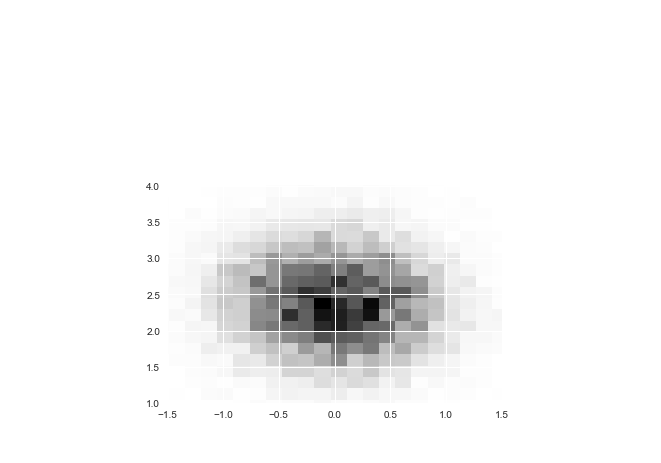

In [7]:
x = data_2.plate_x
y = data_2.plate_z
z = data_2.launch_angle

h = plt.hist2d(x, y, bins=40)
plt.xlim(-1.5, 1.5)
plt.ylim(1.0, 4.0)
plt.colormaps()

#zone.axes[0, 0].plt.Rectangle((-1.0, 1.5), 2.0, 2.0, fill=False, edgecolor='black', lw=3)

plt.show()

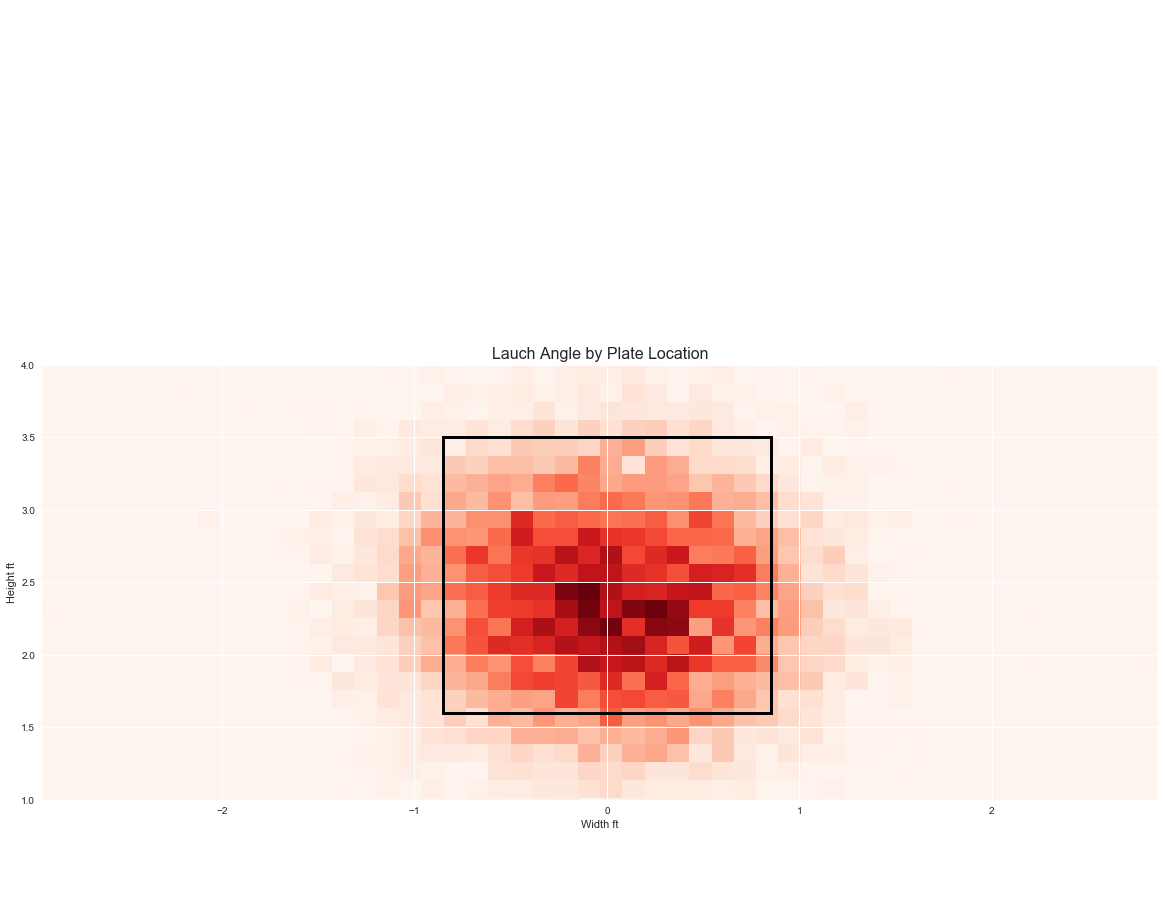

In [9]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)

H = ax.hist2d(data = data_2, x = data_2.plate_x, y = data_2.plate_z, bins=50, cmap = 'Reds')
ax.set_title('Lauch Angle by Plate Location', size = 16)
ax.set_ylim(1, 4)
ax.set_ylabel("Height ft")
ax.set_xlabel("Width ft")

rect = plt.Rectangle((-0.85, 1.6), 1.7, 1.9, fill=False, edgecolor='black', lw=3)
ax.add_patch(rect)

NameError: name 'mappable' is not defined

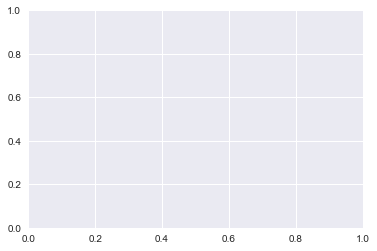

In [32]:
x = data_2.plate_x
y = data_2.plate_z
z = data_2.launch_angle

fig, ax = plt.subplots()
fig.colorbar(mappable)
sns.kdeplot(x, y, shade = True, shade_lowest = False, cmap = "viridis", cbar = True, ax = ax)

plt.show()

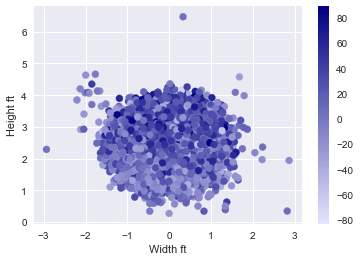

In [43]:
x = data_2.plate_x
y = data_2.plate_z
z = data_2.launch_angle

plt.scatter(x, y, c=z, cmap=my_cmap)
plt.colorbar()
plt.xlabel("Width ft")
plt.ylabel("Height ft")
plt.show()